In [1]:
import numpy as np
from catboost import CatBoostClassifier, datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


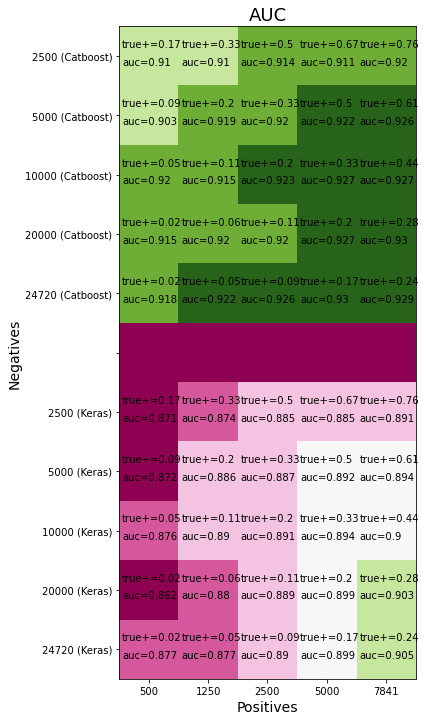

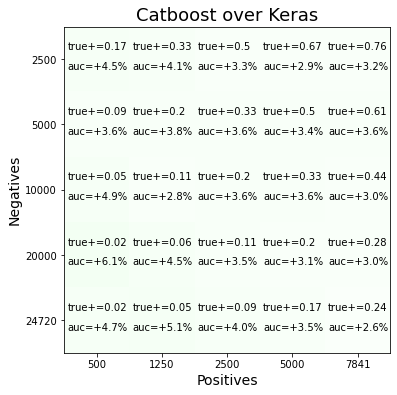

In [2]:
from base_experiment import BaseExperiment

class AdultExperiment(BaseExperiment):
    POSITIVE_STEPS = [500, 1250, 2500, 5000, 7841]
    NEGATIVE_STEPS = [2500, 5000, 10000, 20000, 24720]

    def get_dataset(self):
        df = pd.read_csv('adult/adult.data')
        y = df.label.apply(lambda x: 0 if x.strip() == '<=50K' else 1)
        X = df.drop(columns=['label'])
        cat_features = [
            'workclass', 'education', 'marital_status', 'occupation', 'relationship',
            'race', 'sex', 'native_country',
        ]
        return X, y, cat_features
    
    def get_keras_model(self):
        return keras.Sequential([
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    
AdultExperiment().run()